## 逻辑回归 - 线性不可分案例
案例：设想你是工厂的生产主管，你要决定是否芯片要被接受或抛弃
> 数据集：ex2data2.txt ，芯片在两次测试中的结果

In [57]:
# 导入数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'ex2data2.txt'
data = pd.read_csv(path, names=['Test1', 'Test2', 'Accepted'])
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


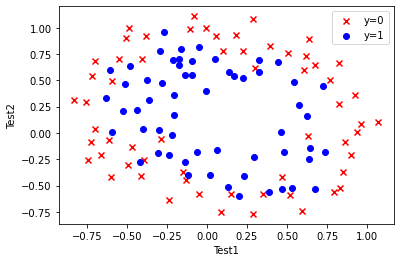

In [58]:
# 可视化数据
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test1'], data[data['Accepted']==0]['Test2'], c='r', marker='x', label='y=0')
ax.scatter(data[data['Accepted']==1]['Test1'], data[data['Accepted']==1]['Test2'], c='b', marker='o', label='y=1')
ax.legend()
ax.set(xlabel='Test1', ylabel='Test2')
plt.show() # 很明显是线性不可分的

## 特征映射

In [59]:
# 定义特征映射函数
def feature_mapping(x1, x2, power):

    data = {}
    
    for i in np.arange(power + 1):
        for j in np.arange(i + 1):
            data['F{}{}'.format(i-j, j)] = np.power(x1, i-j) * np.power(x2, j)
    
    return pd.DataFrame(data)

In [60]:
x1 = data['Test1']
x2 = data['Test2']

In [61]:
data2 = feature_mapping(x1, x2, 6)

In [62]:
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## 构造数据集

In [63]:
X = data2.values
X.shape

(118, 28)

In [64]:
y = data.iloc[:, -1].values

In [65]:
y = y.reshape(len(y), 1)
y.shape

(118, 1)

## 损失函数
$J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left[-y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)-\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]+\frac{\lambda}{2 m} \sum_{j=1}^{n} \theta_{j}^{2}$

> 加上了一个正则化参数（这里使用的是 $L_2$ 正则），为了防止过拟合的。（因为我们特征映射导致了多个特征，这个时候容易导致过拟合现象）

+ Lamda 越小，越易过拟合
+ Lamda 越大，越易欠拟合

In [66]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [67]:
def costFunction(X, y, theta, lamda):
    A = sigmoid(X@theta)
    
    first_part = y * np.log(A)
    second_part = (1-y) * np.log(1 - A)
    reg = np.sum(np.power(theta[1:],2)) * (lamda / (2 *len(X))) # 加入正则化参数
    
    return -np.sum(first_part + second_part) / len(X) + reg

In [68]:
# 初始化
theta = np.zeros((28, 1))
theta.shape

(28, 1)

In [69]:
lamda = 1

In [70]:
cost_init = costFunction(X, y, theta, lamda)
print(cost_init) #打印初始的代价函数

0.6931471805599454


## 梯度下降函数

In [71]:
def gardientDescent(X, y, theta, alpha, iters, lamda):
    
    costs = []
    
    for i in range(iters):
        
        reg = theta[1:] * (lamda / len(X))
        reg = np.insert(reg, 0, values=0, axis=0)
        
        theta = theta - (X.T@(sigmoid(X@theta) - y)) * alpha / len(X) - reg
        cost = costFunction(X, y, theta, lamda)
        costs.append(cost)
        
        if i % 100 == 0:
            print(cost)
    
    return theta, costs

In [72]:
alpha = 0.001
iters = 200000
lamda = 0.001

In [73]:
theta_final, costs = gardientDescent(X, y, theta, alpha, iters, lamda)

0.693134380798985
0.6918726054007459
0.6906454876368255
0.6894510628127222
0.6882874924963255
0.6871530566064498
0.686046145931676
0.6849652550662431
0.6839089757485047
0.6828759905865608
0.6818650671550655
0.6808750524468501
0.6799048676628482
0.6789535033238173
0.6780200146875327
0.6771035174553873
0.6762031837527211
0.67531823836764
0.6744479552335921
0.6735916541415087
0.672748697667896
0.6719184883058489
0.6711004657865657
0.6702941045795318
0.66949891156016
0.6687144238342443
0.6679402067091716
0.6671758518023954
0.6664209752782181
0.6656752162044507
0.6649382350210216
0.6642097121130889
0.6634893464816648
0.6627768545051984
0.6620719687859802
0.6613744370756197
0.6606840212742157
0.6600004964981999
0.6593236502121481
0.6586532814201779
0.6579891999128368
0.6573312255656564
0.6566791876858109
0.6560329244035573
0.6553922821053548
0.6547571149057845
0.6541272841555693
0.6535026579832002
0.6528831108678262
0.6522685232412455
0.6516587811169662
0.6510537757444641
0.6504534032868794


0.5382514327891591
0.5381056478805766
0.5379602220129363
0.5378151539925351
0.5376704426310975
0.5375260867457401
0.5373820851589391
0.5372384366984955
0.537095140197503
0.5369521944943146
0.5368095984325097
0.536667350860862
0.536525450633308
0.536383896608914
0.5362426876518455
0.5361018226313355
0.535961300421654
0.5358211199020769
0.535681279956855
0.535541779475185
0.5354026173511789
0.5352637924838343
0.5351253037770048
0.5349871501393716
0.5348493304844133
0.5347118437303784
0.5345746888002562
0.5344378646217485
0.5343013701272419
0.5341652042537797
0.5340293659430353
0.5338938541412832
0.5337586677993734
0.5336238058727042
0.5334892673211946
0.5333550511092596
0.5332211562057821
0.5330875815840884
0.5329543262219212
0.5328213891014151
0.5326887692090703
0.5325564655357281
0.532424477076545
0.5322928028309695
0.5321614418027155
0.5320303929997398
0.5318996554342157
0.5317692281225113
0.5316391100851648
0.5315093003468594
0.5313797979364022
0.5312506018866996
0.5311217112347338
0

0.4971624826855005
0.497105996170378
0.4970496162003336
0.4969933425299884
0.49693717491467515
0.49688111311043603
0.4968251568740197
0.4967693059628789
0.49671356013516815
0.49665791914974067
0.4966023827661463
0.496546950744629
0.4964916228461242
0.4964363988322558
0.49638127846533514
0.49632626150835707
0.49627134772499787
0.4962165368796136
0.49616182873723635
0.49610722306357286
0.496052719625002
0.49599831818857176
0.49594401852199727
0.4958898203936585
0.4958357235725976
0.495781727828517
0.4957278329317764
0.49567403865339105
0.49562034476502925
0.4955667510390095
0.4955132572482989
0.4954598631665109
0.495406568567902
0.49535337322737066
0.4953002769204545
0.4952472794233278
0.49519438051279985
0.4951415799663119
0.4950888775619359
0.4950362730783715
0.49498376629494417
0.494931356991603
0.4948790449489182
0.49482682994807947
0.4947747117708932
0.49472269019978093
0.49467076501777674
0.4946189360085252
0.4945672029562792
0.494515565645898
0.494464023862845
0.49441257739318545


0.4802359977597917
0.48020942855180065
0.4801829030915567
0.480156421296762
0.48012998308530347
0.48010358837525197
0.4800772370848617
0.48005092913257014
0.4800246644369971
0.4799984429169446
0.4799722644913961
0.4799461290795159
0.4799200366006496
0.4798939869743215
0.47986798012023696
0.4798420159582797
0.47981609440851203
0.4797902153911743
0.47976437882668443
0.4797385846356383
0.4797128327388072
0.4796871230571397
0.47966145551175954
0.4796358300239656
0.4796102465152318
0.4795847049072064
0.4795592051217112
0.4795337470807413
0.47950833070646537
0.47948295592122375
0.47945762264752895
0.47943233080806513
0.4794070803256871
0.4793818711234208
0.4793567031244618
0.4793315762521758
0.47930649043009704
0.479281445581929
0.47925644163154346
0.4792314785029798
0.47920655612044494
0.47918167440831266
0.4791568332911233
0.47913203269358323
0.4791072725405644
0.47908255275710393
0.4790578732684041
0.47903323399983055
0.4790086348769133
0.478984075825346
0.47895955677098495
0.478935077639

0.4720006724391722
0.47198715901509414
0.47197366615592956
0.4719601938274471
0.47194674199548015
0.47193331062592675
0.4719198996847489
0.47190650913797266
0.47189313895168855
0.4718797890920502
0.4718664595252757
0.4718531502176462
0.47183986113550663
0.471826592245265
0.47181334351339255
0.4718001149064232
0.4717869063909544
0.4717737179336459
0.47176054950121993
0.47174740106046165
0.47173427257821793
0.4717211640213983
0.47170807535697423
0.47169500655197905
0.47168195757350795
0.47166892838871755
0.4716559189648262
0.47164292926911344
0.4716299592689201
0.4716170089316484
0.47160407822476097
0.4715911671157817
0.4715782755722951
0.471565403561946
0.47155255105244026
0.47153971801154326
0.4715269044070811
0.47151411020694
0.47150133537906536
0.47148857989146337
0.4714758437121991
0.47146312680939745
0.4714504291512424
0.47143775070597776
0.47142509144190614
0.47141245132738907
0.4713998303308471
0.4713872284207595
0.471374645565664
0.47136208173415717
0.4713495368948935
0.47133701

In [74]:
theta_final

array([[ 1.2052072 ],
       [ 0.5825871 ],
       [ 1.13133192],
       [-1.92011714],
       [-0.83055737],
       [-1.28494641],
       [ 0.10189184],
       [-0.34252061],
       [-0.3413474 ],
       [-0.18126064],
       [-1.40955679],
       [-0.06604286],
       [-0.58032027],
       [-0.2460958 ],
       [-1.14671096],
       [-0.24322073],
       [-0.20113005],
       [-0.05872139],
       [-0.25848869],
       [-0.27166559],
       [-0.4910192 ],
       [-1.01575376],
       [ 0.01109593],
       [-0.28015729],
       [ 0.00479456],
       [-0.30974881],
       [-0.12601945],
       [-0.94013426]])

In [75]:
def predict(X, theta):
    
    prob = sigmoid(X@theta)
    
    return [1 if x >= 0.5 else 0 for x in prob]

In [76]:
y_ = np.array(predict(X, theta_final))
y_pre = y_.reshape(len(y_), 1)

acc = np.mean(y_pre == y)

print(acc)

0.8305084745762712


## 决策界面

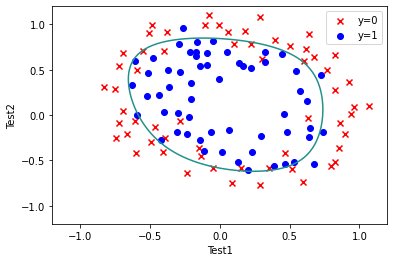

In [80]:
# 画等高线
x = np.linspace(-1.2, 1.2, 200)
xx, yy = np.meshgrid(x, x)
z = feature_mapping(xx.ravel(), yy.ravel(), 6).values

zz = z @ theta_final
zz = zz.reshape(xx.shape) 

fig, ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test1'], data[data['Accepted']==0]['Test2'], c='r', marker='x', label='y=0')
ax.scatter(data[data['Accepted']==1]['Test1'], data[data['Accepted']==1]['Test2'], c='b', marker='o', label='y=1')
ax.legend()
ax.set(xlabel='Test1', ylabel='Test2')

plt.contour(xx, yy, zz, 0) # 等高线是三维的
plt.show() 
# 可以更改上面的 lamda 初始化值看看下方图情况，Lamda 越小，越易过拟合，Lamda 越大，越易欠拟合